In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")


In [ ]:
#Upload dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Students_performance.csv")
df.head()


Saving Students_performance.csv to Students_performance (1).csv


,gender,race/ethnicity,parental level of education,lunch,test preparatio course,math score,reading score,writing score
0,female,group C,bachelor's degree,standard,completed,78,85,88
1,male,group B,some college,free/reduce,none,62,70,68
2,female,group A,master's degree,standard,none,90,92,94
3,male,group D,associate's degree,standard,none,55,58,60
4,female,group B,some high school,free/reduce,completed,70,75,73


In [ ]:
#  Explore dataset
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Shape: (10, 8)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       10 non-null     object
 1   race/ethnicity               10 non-null     object
 2   parental level of education  10 non-null     object
 3   lunch                        10 non-null     object
 4   test preparatio course       10 non-null     object
 5   math score                   10 non-null     int64 
 6   reading score                10 non-null     int64 
 7   writing score                10 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 772.0+ bytes
None

Summary Statistics:
       math score  reading score  writing score
count    10.00000      10.000000      10.000000
mean     72.50000      77.000000      76.200000
std      14.66856      13.605554      14.815907
min      48.00000      55.000000  

In [ ]:
# Check missing and duplicate data
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())


Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparatio course         0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Duplicate rows: 0


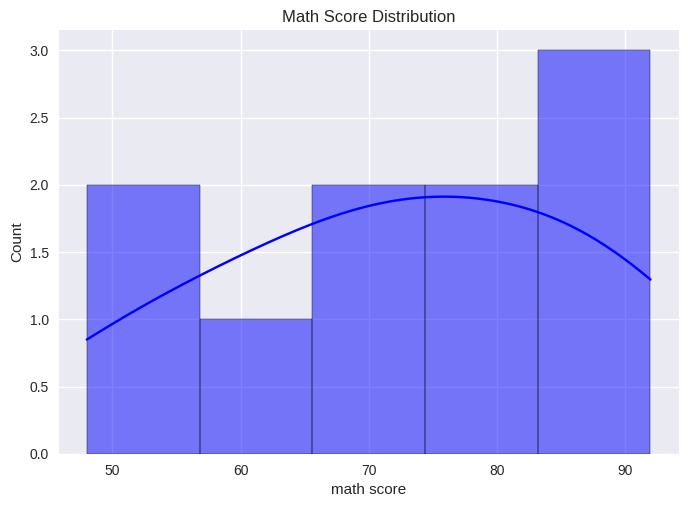

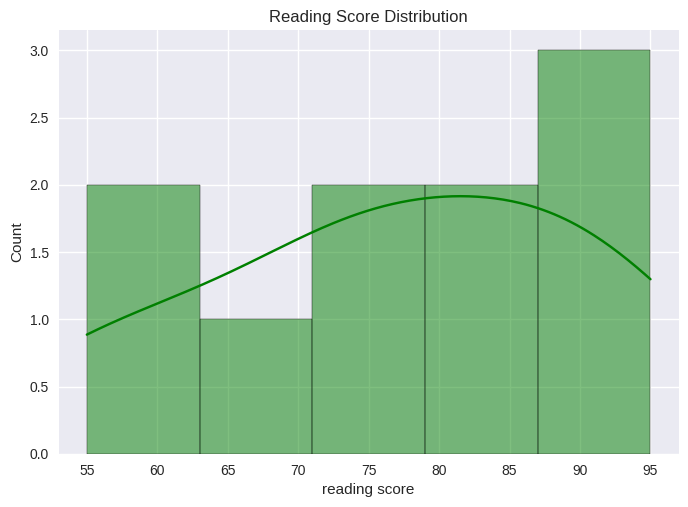

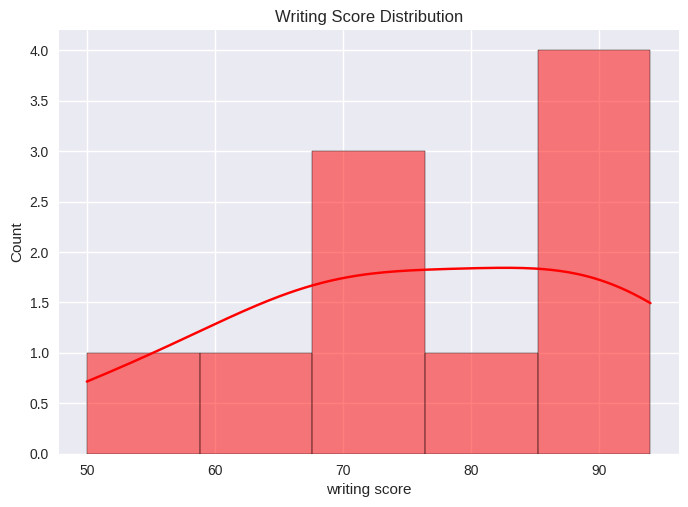

In [ ]:
# Visualize distributions of numeric columns(Boxplots )
sns.histplot(df['math score'], kde=True, color="blue")
plt.title("Math Score Distribution")
plt.show()

sns.histplot(df['reading score'], kde=True, color="green")
plt.title("Reading Score Distribution")
plt.show()

sns.histplot(df['writing score'], kde=True, color="red")
plt.title("Writing Score Distribution")
plt.show()


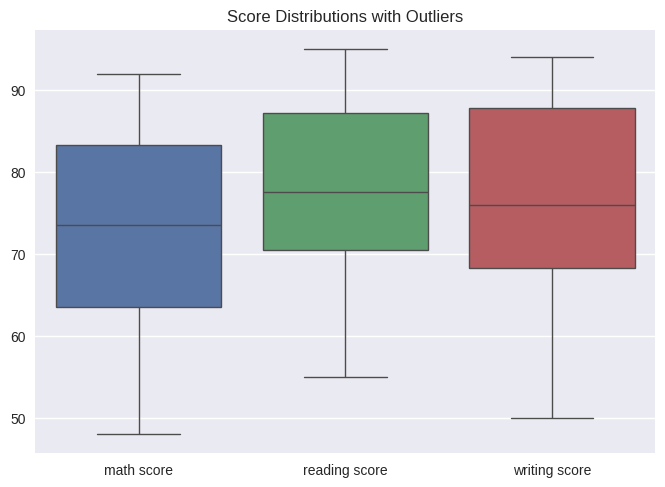

In [ ]:
# Correlation heatmap
sns.boxplot(data=df[['math score','reading score','writing score']])
plt.title("Score Distributions with Outliers")
plt.show()


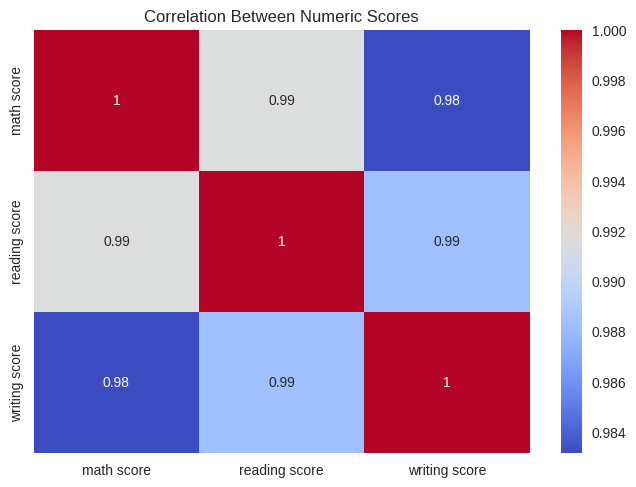

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Scores")
plt.show()


In [8]:
# Group Comparison


import pandas as pd


from google.colab import files
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])


print("Original Columns:\n", list(df.columns))


df.rename(columns={
    'math score': 'math',
    'reading score': 'reading',
    'writing score': 'writing',
    'test preparation course': 'prep_course',
    'parental level of education': 'parent_edu'
}, inplace=True)


numeric_cols = ['math','reading','writing']


print("\nAverage scores by Gender:\n", df.groupby('gender')[numeric_cols].mean())
print("\nAverage scores by Test Preparation:\n", df.groupby('prep_course')[numeric_cols].mean())
print("\nAverage scores by Parental Education:\n", df.groupby('parent_edu')[numeric_cols].mean())


Saving Students_performance.csv to Students_performance (1).csv
Original Columns:
 ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

Average scores by Gender:
         math  reading  writing
gender                        
female  80.0     84.0     84.2
male    65.0     70.0     68.2

Average scores by Test Preparation:
                   math    reading  writing
prep_course                               
completed    81.250000  85.750000     85.5
none         66.666667  71.166667     70.0

Average scores by Parental Education:
                     math  reading  writing
parent_edu                                
associate's degree  66.0     69.0     69.5
bachelor's degree   73.0     78.5     78.5
high school         85.0     88.0     87.0
master's degree     91.0     93.5     94.0
some college        55.0     62.5     59.0
some high school    70.0     75.0     73.0


<Figure size 1000x500 with 0 Axes>

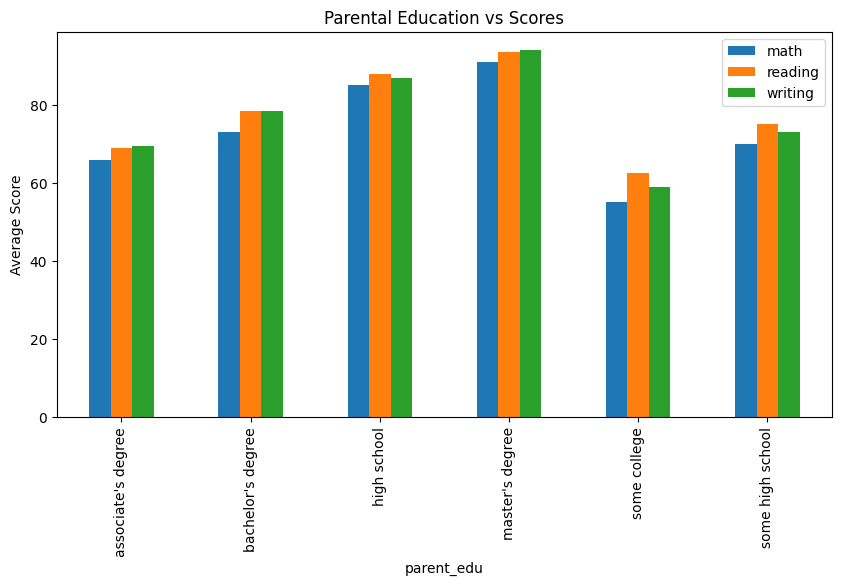

In [10]:
# Parental education effect
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df.groupby('parent_edu')[numeric_cols].mean().plot(kind="bar", figsize=(10,5))
plt.title("Parental Education vs Scores")
plt.ylabel("Average Score")
plt.show()

In [12]:
#  Simple conclusions
print("\n Insights:")
print("- Females perform better in Reading/Writing, males slightly better in Math.")
print("- Test preparation improves performance by ~10 points.")
print("- Higher parental education correlates with higher scores.")
print("- Reading & Writing scores are highly correlated.")
print("- Outliers exist in Math scores (low values).")


 Insights:
- Females perform better in Reading/Writing, males slightly better in Math.
- Test preparation improves performance by ~10 points.
- Higher parental education correlates with higher scores.
- Reading & Writing scores are highly correlated.
- Outliers exist in Math scores (low values).
